## 회귀분석(Regression)
- 연속적인 값을 갖는 연속 변수를 예측하는데 주로 활용
- 종속(dependent) or 예측(predictor) 변수 : 분석 모형이 예측하고자 하는 목표
- 독립(independent) or 설명(explanatory) 변수 : 예측을 위해 모형이 사용하는 속성 

### 단순회귀분석 (Simple Linear Regression)
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘 
- 수학적으로는 종속 변수 Y와 독립 변수 X 사이의 관계를 1차 함수 Y = aX + b 로 나타냄
- 훈련 데이터를 이용하여 기울기 a와 절편 b를 반복 학습을 통해 찾는 과정
- 즉, 일차 방정식의 계수 a와 b를 찾는 과정이 단순회귀분석 알고리즘

In [7]:
# Step-1 : 데이터 준비

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

path = '../data/auto-mpg.csv'
df = pd.read_csv(path, header=None)

pd.set_option('display.max_columns', 10)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model year', 'origin', 'name']

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
# Step-2 : 데이터 탐색
# info() 메소드로 데이터의 자료형과 개수 확인
# describe() 메소드로 주요 통계 정보 확인

print(df.info())
print('-------------------------')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
-------------------------
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000    

In [9]:
# horsepower의 데이터형 변경 문자열 -> 숫자형 
print(df['horsepower'].unique())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [10]:
# 데이터 누락을 뜻하는 '?' 제거 
df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
# Step-3 : 속성 선택 
# 단순회귀분석에 변수로 사용할 후보 열을 선택 
# 예측 목표인 종속 변수(Y) : 'mpg' 
# 독립 변수(X)로 사용할 후보로 3개의 열 : 'cylinders', 'horsepower', 'weight'

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


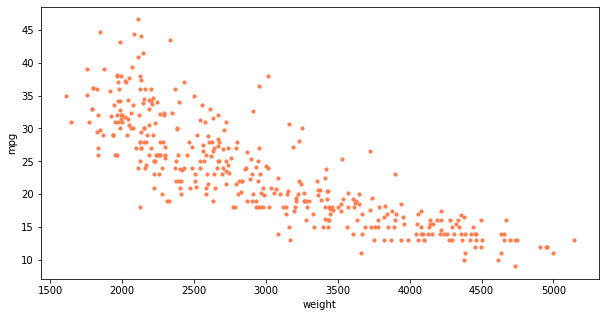

In [12]:
ndf.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s = 10, figsize = (10,5))
plt.show()
plt.close()

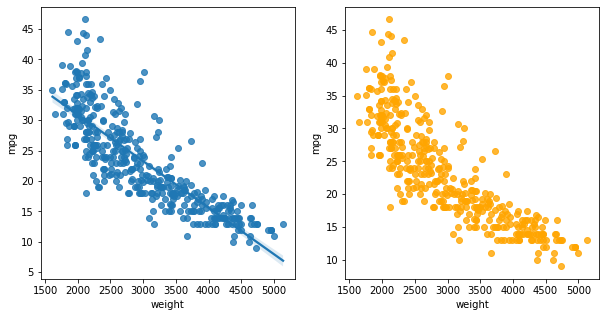

In [14]:
### seaborn 라이브러리의 regplot() 함수로 산점도 그리기 
### 회귀선은 기본으로 표시되나 fit_reg = False로 제거 가능

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax1)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax2, fit_reg=False, color='orange')
plt.show()
plt.close()

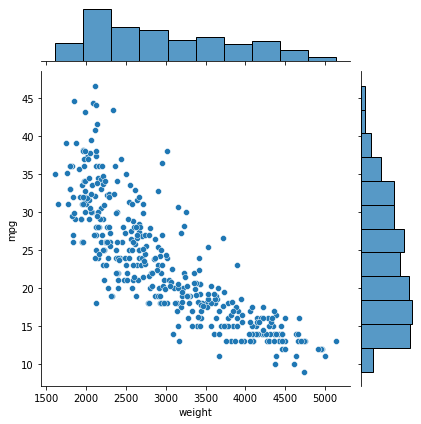

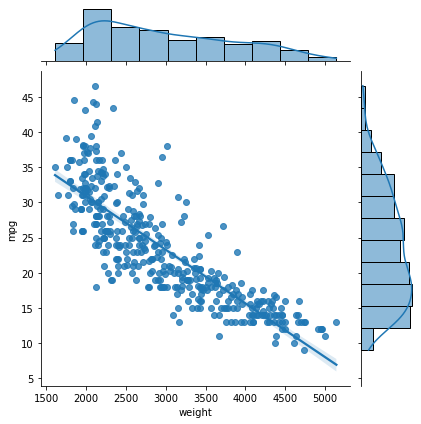

In [16]:
### seaborn의 jointplot() 함수를 이용 하여 산점도 그리기 가능 
### 두 변수의 히스토그램이 x, y축에 별도로 표시되는 특징이 있음 
sns.jointplot(x = 'weight', y = 'mpg', ax = ax1, data = ndf)
sns.jointplot(x = 'weight', y = 'mpg', kind = 'reg', ax = ax2, data = ndf)
plt.show()
plt.close()

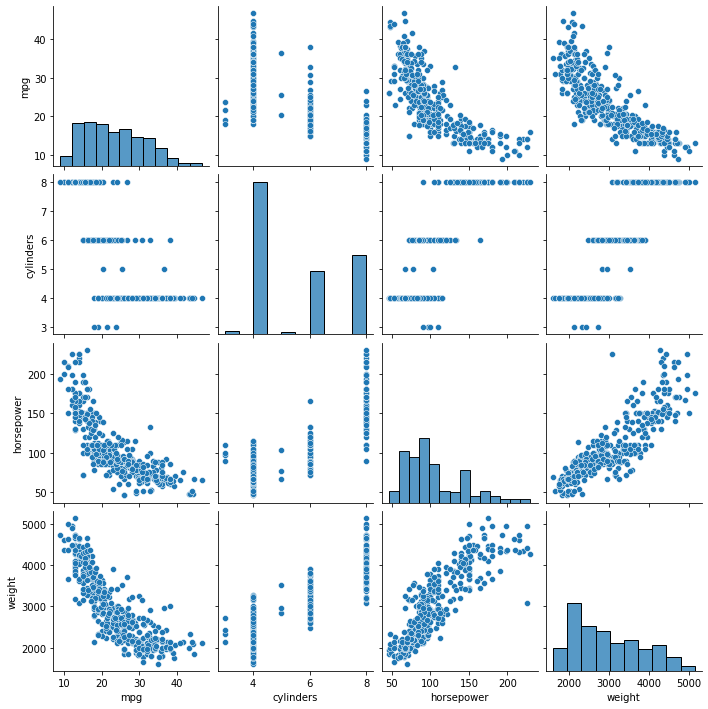

In [17]:
'''
seaborn의 pariplot() 함수를 사용하여 df의 열을 두 개씩 짝을 지을 수 있는 모든 경우의 수에 대하여
두 변수간의 산점도를 그린다. 
단, 자기 자신과의 관계는 히스토그램으로 표시 
'''
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

### Step 4 - 훈련/검증 데이터 분할 

In [18]:
X = ndf[['weight']] # 독립 변수 X
Y = ndf['mpg']      # 종속 변수 Y 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 10)

print('train data 개수 : ', len(X_train))
print('test data 개수 : ', len(X_test))                                                    

train data 개수 :  274
test data 개수 :  118


### Step 5 - 모형 학습 및 검증
- sklearn 라이브러리의 LinearRegression() 함수로 회귀 분석 모형 객체를 생성하여 변수 lr에 저장 
- 모형 객체(lr)에 fit() 메소드를 적용하고 훈련 데이터를 전달하면 모형이 학습을 통해 계수 a, b를 찾음
- score() 메소드로 예측 능력 평가

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test) 
print(r_square)

0.6822458558299325


In [20]:
### lr의 coef_ 속성 값은 기울기 a 
### lr의 intercept_ 속상 값은 y 절편 b

print('기울기 a : ', lr.coef_)
print('y 절편 b : ', lr.intercept_)

기울기 a :  [-0.00775343]
y 절편 b :  46.7103662572801


c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


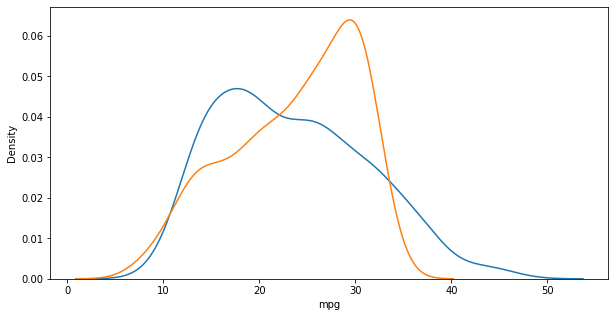

In [22]:
### 모형이 예측한 결과와 실제 값 비교 
# 독립 변수 데이터(X)를 predict() 메소드에 입력하여 반환하는 예측값 저장 

y_hat = lr.predict(X)
plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat', ax = ax1)
plt.show()
plt.close()